In [ ]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda skills: ast.literal_eval(skills) if pd.notna(skills) else []
)
df["job_skills"] = df["job_skills"].apply(
    lambda skills: [skill.title() for skill in skills] if len(skills) > 0 else skills
)

In [ ]:
df_da_us = df[
    (df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")
].copy()

In [45]:
df_da_us.dropna(subset=["salary_year_avg"], inplace=True)

df_da_us_exploded = df_da_us.explode("job_skills")

df_da_us_exploded[["salary_year_avg", "job_skills"]].head()

,salary_year_avg,job_skills
109,89000.0,Python
109,89000.0,R
109,89000.0,Alteryx
109,89000.0,Tableau
180,90250.0,Excel


In [ ]:
df_da_skills = (
    df_da_us_exploded.groupby("job_skills")["salary_year_avg"]
    .agg(["count", "median"])
    .sort_values("count", ascending=False)
)

df_da_skills = df_da_skills.rename(
    columns={"count": "skill_count", "median": "median_salary"}
)

da_job_count = len(df_da_us)

df_da_skills["skill_percent"] = df_da_skills["skill_count"] / da_job_count * 100

skill_percent = 5

df_da_skills_hd = df_da_skills[df_da_skills["skill_percent"] > skill_percent]

df_da_skills_hd

,skill_count,median_salary,skill_percent
job_skills,,,
Sql,2508,91000.00,57.655172
Excel,1808,84392.00,41.563218
Python,1431,97500.00,32.896552
Tableau,1364,92875.00,31.356322
Sas,926,90000.00,21.287356
R,893,92500.00,20.528736
Power Bi,838,90000.00,19.264368
Powerpoint,462,85000.00,10.620690
Word,461,81194.75,10.597701


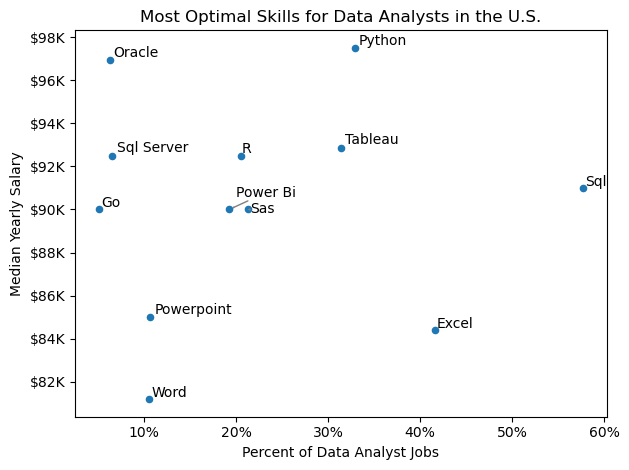

In [ ]:
from adjustText import adjust_text

df_da_skills_hd.plot(kind="scatter", x="skill_percent", y="median_salary")

texts = []
for i, txt in enumerate(df_da_skills_hd.index):
    texts.append(
        plt.text(
            df_da_skills_hd["skill_percent"].iloc[i],
            df_da_skills_hd["median_salary"].iloc[i],
            txt,
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray"))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the U.S.")

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
ax.xaxis.set_major_formatter((PercentFormatter(decimals=0)))

plt.tight_layout()
plt.show()

In [ ]:
df_technology = df["job_type_skills"].copy()

df_technology.drop_duplicates(inplace=True)

df_technology.dropna(inplace=True)

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ms access',
  'visio',
  'msaccess',
  'dax',
  'ssrs',
  'splunk',
  'power bi',
  'excel',
  'alteryx',
  'word',
  'spss',
  'datarobot',
  'spreadsheet',
  'cognos',
  'looker',
  'qlik',
  'powerpoint',
  'powerbi',
  'outlook',
  'tableau',
  'sheets',
  'esquisse',
  'nuix',
  'sharepoint',
  'ssis',
  'sas',
  'microstrategy',
  'sap'],
 'programming': ['python',
  'groovy',
  'dart',
  'c++',
  'mongo',
  'c#',
  'cobol',
  'javascript',
  'bash',
  'lisp',
  'julia',
  'c',
  'assembly',
  'visual basic',
  'golang',
  'solidity',
  'elixir',
  'scala',
  'sql',
  'matlab',
  'crystal',
  'php',
  'swift',
  'ocaml',
  'kotlin',
  'ruby',
  'vba',
  'shell',
  'rust',
  'go',
  'typescript',
  'no-sql',
  'pascal',
  'visualbasic',
  'java',
  't-sql',
  'clojure',
  'erlang',
  'objective-c',
  'fortran',
  'apl',
  'delphi',
  'r',
  'mongodb',
  'haskell',
  'sas',
  'lua',
  'nosql',
  'html',
  'sass',
  'f#',
  'css',
  'vb.net',
  'powershell',
  'p

In [ ]:
df_technology = pd.DataFrame(
    list(technology_dict.items()), columns=["technology", "skills"]
)

df_technology = df_technology.explode("skills")

df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,visio
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,ssrs
...,...,...
9,sync,slack
9,sync,google chat
9,sync,wire
9,sync,symphony


In [64]:
df_technology["skills"] = df_technology["skills"].str.title()

df_plot = df_da_skills_hd.merge(df_technology, left_on="job_skills", right_on="skills")

df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,Sql
1,1808,84392.00,41.563218,analyst_tools,Excel
2,1431,97500.00,32.896552,programming,Python
3,1364,92875.00,31.356322,analyst_tools,Tableau
4,926,90000.00,21.287356,analyst_tools,Sas
5,926,90000.00,21.287356,programming,Sas
6,893,92500.00,20.528736,programming,R
7,838,90000.00,19.264368,analyst_tools,Power Bi
8,462,85000.00,10.620690,analyst_tools,Powerpoint
9,461,81194.75,10.597701,analyst_tools,Word


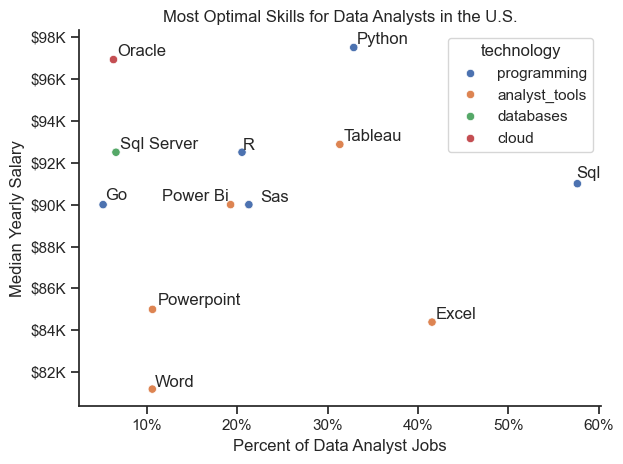

In [ ]:
from adjustText import adjust_text

sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="technology",
)

sns.despine()
sns.set_theme(style="ticks")

texts = []
offsets = {"Power Bi": (-8, 0), "Sas": (1, 0)}
for i, txt in enumerate(df_da_skills_hd.index):
    x = df_da_skills_hd["skill_percent"].iloc[i]
    y = df_da_skills_hd["median_salary"].iloc[i]
    dx, dy = offsets.get(txt, (0, 0))
    texts.append(plt.text(x + dx, y + dy, txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray"))

plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary")
plt.title("Most Optimal Skills for Data Analysts in the U.S.")

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
ax.xaxis.set_major_formatter((PercentFormatter(decimals=0)))

plt.tight_layout()
plt.show()